In [1]:
import pandas as pd
import numpy as np

In [2]:
multi_index = pd.read_csv('multifam.csv')

In [3]:
index_fl = multi_index.loc[multi_index['State']== 'FL']

In [4]:
columns = index_fl.columns
date_columns = []
other_columns = []
for column in columns:
    if '2' in column:
        date_columns.append(column)
    else:
        other_columns.append(column)
print(date_columns)
print(other_columns)

['2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03'

In [5]:
fl = pd.melt(index_fl, id_vars = other_columns , value_vars = date_columns)
fl = fl.rename(columns={"variable": "Date", "value": "Rent_Index"})

In [6]:
fl['Date'] = pd.to_datetime(fl['Date'])

In [7]:
fl['Year'] = fl.Date.dt.year
fl['Yearly_Avg'] = fl.groupby([fl.Metro, fl.Year])['Rent_Index'].transform('mean')

In [8]:
fl.Metro.unique()

array(['Miami-Fort Lauderdale-West Palm Beach',
       'Orlando-Kissimmee-Sanford', 'Cape Coral-Fort Myers',
       'Jacksonville', 'North Port-Sarasota-Bradenton', 'Gainesville',
       'Tampa-St. Petersburg-Clearwater', 'Palm Bay-Melbourne-Titusville',
       'Naples-Immokalee-Marco Island', 'Tallahassee', 'Punta Gorda'],
      dtype=object)

In [9]:
fl.Metro.unique()
Metros_Used = ['Miami-Fort Lauderdale-West Palm Beach','Orlando-Kissimmee-Sanford', 'Tampa-St. Petersburg-Clearwater','Jacksonville']
fl = fl.loc[fl['Metro'].isin(Metros_Used)]

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Year', ylabel='Yearly_Avg'>

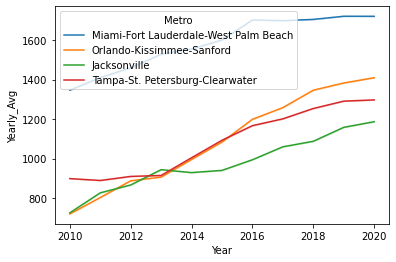

In [11]:
metro_graph = sns.lineplot(x="Year", y="Yearly_Avg",
             hue="Metro",
             data=fl)
metro_graph

In [12]:
fl.describe()

,RegionID,RegionName,SizeRank,Rent_Index,Year,Yearly_Avg
count,16385.000000,16385.000000,16385.000000,10723.000000,16385.000000,16385.000000
mean,74729.082759,33222.558621,902.744828,1388.216917,2014.867257,1335.655258
std,27072.818781,499.068635,503.985039,352.019565,2.731430,302.167495
min,71858.000000,32204.000000,72.000000,626.000000,2010.000000,719.687500
25%,72347.000000,33009.000000,411.000000,1127.000000,2013.000000,1083.791878
50%,72460.000000,33157.000000,905.000000,1375.000000,2015.000000,1409.640000
75%,72620.000000,33461.000000,1343.000000,1622.000000,2017.000000,1600.727145
max,399576.000000,34787.000000,1821.000000,2416.000000,2020.000000,1721.008895


<AxesSubplot:>

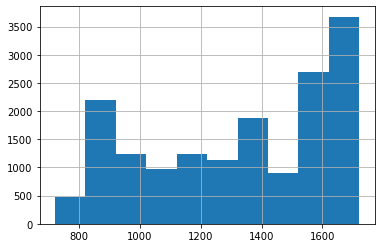

In [13]:
fl.Yearly_Avg.hist()

Year
2010    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2011    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2012    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2013    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2014    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2015    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2016    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2017    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2018    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2019    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2020    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

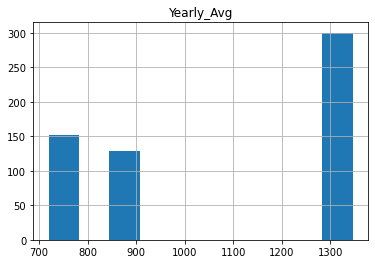

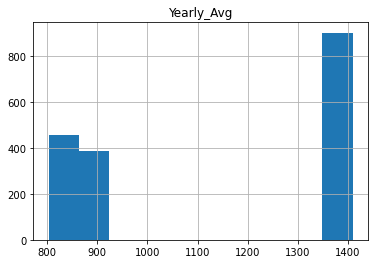

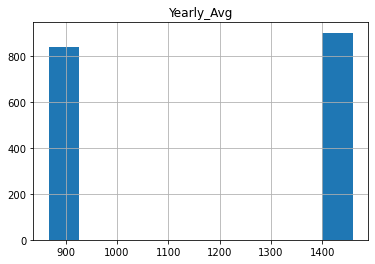

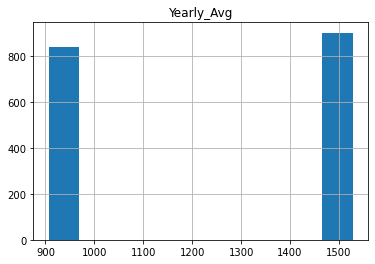

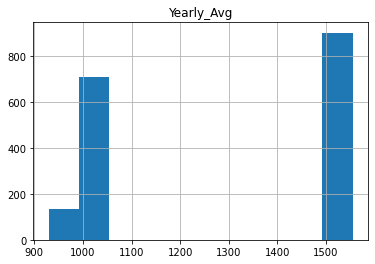

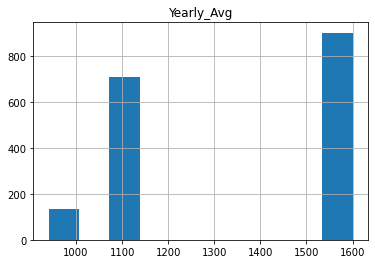

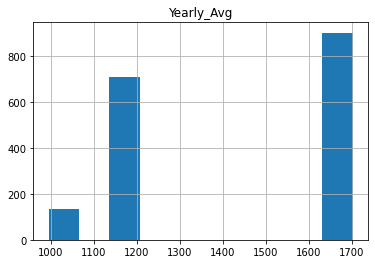

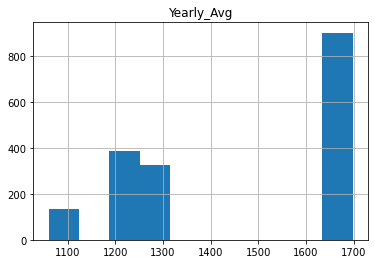

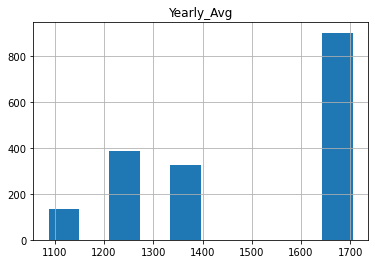

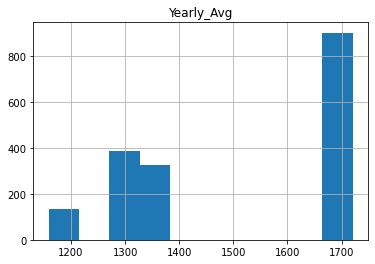

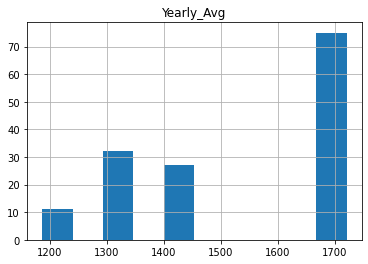

In [14]:
fl.groupby(['Year']).hist('Yearly_Avg')

In [15]:
fl = fl.rename(columns={'RegionName':'Zip'})
fl

,RegionID,Zip,City,State,Metro,CountyName,SizeRank,Date,Rent_Index,Year,Yearly_Avg
0,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,72,2010-09-01,1622.0,2010,1346.532110
1,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,73,2010-09-01,NaN,2010,719.687500
2,72363,33025,Miramar,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,86,2010-09-01,1106.0,2010,1346.532110
3,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,91,2010-09-01,1388.0,2010,1346.532110
4,72362,33024,Pembroke Pines,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,128,2010-09-01,NaN,2010,1346.532110
...,...,...,...,...,...,...,...,...,...,...,...
19655,72534,33315,Fort Lauderdale,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,1753,2020-01-01,1443.0,2020,1720.764706
19656,72251,32827,Orlando,FL,Orlando-Kissimmee-Sanford,Orange County,1754,2020-01-01,1544.0,2020,1409.640000
19657,72580,33413,Greenacres,FL,Miami-Fort Lauderdale-West Palm Beach,Palm Beach County,1783,2020-01-01,1459.0,2020,1720.764706
19658,72449,33146,Coral Gables,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,1803,2020-01-01,2373.0,2020,1720.764706


In [16]:
fl['Zip'].unique()

array([33160, 34787, 33025, 33139, 33024, 32256, 34711, 33009, 32822,
       33186, 33064, 33027, 33311, 33313, 32828, 32225, 32246, 33157,
       32765, 32792, 33511, 33578, 33458, 32825, 33414, 32771, 33433,
       33436, 33141, 33324, 33178, 33021, 32839, 33308, 34698, 33418,
       33312, 33065, 33033, 33020, 33125, 32837, 33615, 32216, 33617,
       33142, 33062, 33612, 32703, 33180, 33130, 33179, 33068, 32835,
       33126, 32224, 33161, 33435, 33134, 33196, 33461, 33445, 32714,
       33131, 33172, 32207, 33401, 33771, 32811, 33611, 33133, 33702,
       33604, 33613, 33147, 32209, 33707, 33135, 33010, 33060, 33756,
       32812, 32250, 32205, 33140, 33764, 33404, 34683, 33137, 33143,
       34684, 33334, 33705, 33432, 32810, 33460, 33156, 33138, 32807,
       33407, 33626, 32817, 32806, 33304, 32821, 33701, 33607, 33712,
       34747, 33510, 33755, 33145, 32701, 33314, 32803, 33301, 32801,
       33706, 33708, 33066, 33716, 33602, 33444, 33127, 33150, 32751,
       33606, 33154,

In [17]:
miami = fl.loc[fl['Metro'] == 'Miami-Fort Lauderdale-West Palm Beach']
miami['Zip'].unique()

array([33160, 33025, 33139, 33024, 33009, 33186, 33064, 33027, 33311,
       33313, 33157, 33458, 33414, 33433, 33436, 33141, 33324, 33178,
       33021, 33308, 33418, 33312, 33065, 33033, 33020, 33125, 33142,
       33062, 33180, 33130, 33179, 33068, 33126, 33161, 33435, 33134,
       33196, 33461, 33445, 33131, 33172, 33401, 33133, 33147, 33135,
       33010, 33060, 33140, 33404, 33137, 33143, 33334, 33432, 33460,
       33156, 33138, 33407, 33304, 33145, 33314, 33301, 33066, 33444,
       33127, 33150, 33154, 33132, 33483, 33004, 33323, 33316, 33305,
       33315, 33413, 33146])

In [18]:
fl_unemployment = pd.read_csv('unemployment.csv')

In [19]:
fl_unemployment

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,2010,10.9,10.9,10.9,10.9,10.8,10.8,10.8,10.8,10.8,10.8,10.8,10.7,NaN
1,2011,10.6,10.5,10.4,10.3,10.2,10.1,10.0,9.9,9.7,9.6,9.4,9.3,NaN
2,2012,9.2,9.1,9.0,8.9,8.9,8.8,8.6,8.5,8.4,8.3,8.2,8.1,NaN
3,2013,8.0,8.0,7.9,7.8,7.6,7.6,7.5,7.4,7.3,7.2,7.1,7.0,NaN
4,2014,6.9,6.8,6.7,6.7,6.6,6.5,6.4,6.3,6.2,6.1,6.0,6.0,NaN
5,2015,5.9,5.8,5.8,5.7,5.7,5.6,5.5,5.4,5.3,5.3,5.2,5.1,NaN
6,2016,5.1,5.0,5.0,4.9,4.9,4.9,4.9,4.9,4.9,4.9,4.8,4.8,NaN
7,2017,4.7,4.5,4.4,4.3,4.3,4.2,4.2,4.2,4.1,4.1,4.0,4.0,NaN
8,2018,3.9,3.9,3.8,3.7,3.6,3.6,3.5,3.5,3.5,3.5,3.5,3.5,NaN
9,2019,3.5,3.4,3.4,3.3,3.3,3.2,3.3,3.3,3.2,3.2,3.2,3.2,NaN


In [20]:
fl['Year'].dtypes

dtype('int64')

In [21]:
fl_unemployment['Year'].dtypes

dtype('int64')

In [22]:
fl_unemployment['Annual'] = fl_unemployment.iloc[:, 1:13].mean(axis=1)

In [23]:
fl_unemployment_yearly = fl_unemployment[['Year', 'Annual']]
fl_unemployment_yearly = fl_unemployment_yearly.rename(columns = {'Annual': 'Yearly_Unemployment'})

In [24]:
fl_unemployment_yearly #**** TO BE ADDED TO FL

,Year,Yearly_Unemployment
0,2010,10.825000
1,2011,10.000000
2,2012,8.666667
3,2013,7.533333
4,2014,6.433333
5,2015,5.525000
6,2016,4.916667
7,2017,4.250000
8,2018,3.625000
9,2019,3.291667


In [25]:
fl_employment = pd.read_csv('nonfarm.csv')

In [26]:
fl_employment['Yearly_Nonfarm_Employment'] = fl_employment.iloc[:, 1:13].mean(axis=1)
fl_employment_yearly = fl_employment[['Year', 'Yearly_Nonfarm_Employment']]

In [27]:
bls = fl_unemployment_yearly.merge(fl_employment_yearly, on= 'Year')

In [28]:
bls

,Year,Yearly_Unemployment,Yearly_Nonfarm_Employment
0,2010,10.825000,7175.108333
1,2011,10.000000,7255.075000
2,2012,8.666667,7399.200000
3,2013,7.533333,7585.275000
4,2014,6.433333,7827.050000
5,2015,5.525000,8110.666667
6,2016,4.916667,8387.658333
7,2017,4.250000,8570.650000
8,2018,3.625000,8782.808333
9,2019,3.291667,8966.341667


In [29]:
fl = fl.rename(columns={'Yearly_Avg': 'Yearly_Avg_Metro'})
fl['Yearly_Avg_Zip'] = fl.groupby([fl.Zip, fl.Year])['Rent_Index'].transform('mean')
fl

,RegionID,Zip,City,State,Metro,CountyName,SizeRank,Date,Rent_Index,Year,Yearly_Avg_Metro,Yearly_Avg_Zip
0,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,72,2010-09-01,1622.0,2010,1346.532110,1640.0
1,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,73,2010-09-01,NaN,2010,719.687500,NaN
2,72363,33025,Miramar,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,86,2010-09-01,1106.0,2010,1346.532110,1128.5
3,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,91,2010-09-01,1388.0,2010,1346.532110,1437.0
4,72362,33024,Pembroke Pines,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,128,2010-09-01,NaN,2010,1346.532110,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19655,72534,33315,Fort Lauderdale,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,1753,2020-01-01,1443.0,2020,1720.764706,1443.0
19656,72251,32827,Orlando,FL,Orlando-Kissimmee-Sanford,Orange County,1754,2020-01-01,1544.0,2020,1409.640000,1544.0
19657,72580,33413,Greenacres,FL,Miami-Fort Lauderdale-West Palm Beach,Palm Beach County,1783,2020-01-01,1459.0,2020,1720.764706,1459.0
19658,72449,33146,Coral Gables,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,1803,2020-01-01,2373.0,2020,1720.764706,2373.0


In [30]:
total_yearly = fl.merge(bls, on='Year')

In [32]:
total_yearly= total_yearly.drop('Date', axis=1)

In [33]:
zip_yearly = total_yearly.dropna(axis=0)

In [34]:
zip_yearly = zip_yearly[['Zip','Yearly_Avg_Zip','Yearly_Unemployment', 'Yearly_Nonfarm_Employment', 'Year']]

In [35]:
zip_yearly['Encoded_Zip'] = zip_yearly['Zip']

In [36]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [37]:
zip_yearly['Encoded_Zip'] = le.fit_transform(zip_yearly['Encoded_Zip'])

In [38]:
zip_yearly.corr(method='pearson')

,Zip,Yearly_Avg_Zip,Yearly_Unemployment,Yearly_Nonfarm_Employment,Year,Encoded_Zip
Zip,1.000000,-0.010875,0.045431,-0.036045,-0.033426,0.924903
Yearly_Avg_Zip,-0.010875,1.000000,-0.330274,0.343729,0.341978,-0.038779
Yearly_Unemployment,0.045431,-0.330274,1.000000,-0.961863,-0.932704,0.026937
Yearly_Nonfarm_Employment,-0.036045,0.343729,-0.961863,1.000000,0.986637,-0.020398
Year,-0.033426,0.341978,-0.932704,0.986637,1.000000,-0.018423
Encoded_Zip,0.924903,-0.038779,0.026937,-0.020398,-0.018423,1.000000


In [39]:
zip_yearly_features = zip_yearly.drop(['Zip', 'Yearly_Avg_Zip'], axis=1)
zip_yearly_target = zip_yearly['Yearly_Avg_Zip']
zip_yearly_features = zip_yearly_features.drop('Yearly_Nonfarm_Employment', axis=1)

In [40]:
acs = pd.read_csv('acs')

In [41]:
acs

,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,...,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english,zip_code,year
0,2510,856,1283,1227,42.1,58,75,87,52,13,...,304,171,80,593,20,NaN,NaN,NaN,87537,2018
1,346,112,150,196,50.9,0,0,12,10,9,...,0,27,15,96,40,NaN,NaN,NaN,87017,2018
2,3505,727,1758,1747,27.9,260,194,159,121,38,...,293,266,298,1237,138,NaN,NaN,NaN,87528,2018
3,133,58,49,84,25.8,0,12,8,4,8,...,24,8,7,58,3,NaN,NaN,NaN,87533,2018
4,2896,787,1177,1719,36.0,142,63,44,123,0,...,263,107,163,1008,279,NaN,NaN,NaN,87511,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132351,8138,2713,3952,4186,45.3,115,340,318,106,54,...,656,577,421,2127,205,7222.0,135.0,45.0,1921,2015
132352,13160,4189,6569,6591,40.0,255,432,740,435,223,...,997,949,1121,4214,586,12190.0,113.0,49.0,73025,2015
132353,28371,9076,14439,13932,42.5,670,1369,1842,1155,345,...,2106,2610,2681,9739,994,24211.0,1047.0,329.0,76092,2015
132354,10740,3638,5527,5213,44.1,354,467,541,333,155,...,598,809,851,3165,353,9771.0,95.0,32.0,2061,2015


In [42]:
zip_yearly = zip_yearly.rename(columns= {'Zip': 'zip_code', 'Year': 'year'})
zip_yearly = zip_yearly.drop('Yearly_Nonfarm_Employment', axis=1)

In [43]:
total_df = zip_yearly.merge(acs, on=['zip_code', 'year'])

In [44]:
total_df = total_df.rename(columns={'Yearly_Unemployment': 'FL_Unemployment'})

In [45]:
total_df

,zip_code,Yearly_Avg_Zip,FL_Unemployment,year,Encoded_Zip,total_pop,households,male_pop,female_pop,median_age,...,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,speak_only_english_at_home,speak_spanish_at_home,speak_spanish_at_home_low_english
0,33160,1988.0,5.525,2015,73,39235,19187,19087,20148,48.8,...,8276.0,5554.0,1312,994,1283,6732,1737,12501.0,15531.0,7593.0
1,33160,1988.0,5.525,2015,73,39235,19187,19087,20148,48.8,...,8276.0,5554.0,1312,994,1283,6732,1737,12501.0,15531.0,7593.0
2,33160,1988.0,5.525,2015,73,39235,19187,19087,20148,48.8,...,8276.0,5554.0,1312,994,1283,6732,1737,12501.0,15531.0,7593.0
3,33160,1988.0,5.525,2015,73,39235,19187,19087,20148,48.8,...,8276.0,5554.0,1312,994,1283,6732,1737,12501.0,15531.0,7593.0
4,33160,1988.0,5.525,2015,73,39235,19187,19087,20148,48.8,...,8276.0,5554.0,1312,994,1283,6732,1737,12501.0,15531.0,7593.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,33605,1433.5,3.625,2018,115,17457,7041,8207,9250,35.0,...,1388.0,1781.0,692,1096,794,3907,728,NaN,NaN,NaN
5637,33605,1433.5,3.625,2018,115,17457,7041,8207,9250,35.0,...,1388.0,1781.0,692,1096,794,3907,728,NaN,NaN,NaN
5638,33605,1433.5,3.625,2018,115,17457,7041,8207,9250,35.0,...,1388.0,1781.0,692,1096,794,3907,728,NaN,NaN,NaN
5639,33605,1433.5,3.625,2018,115,17457,7041,8207,9250,35.0,...,1388.0,1781.0,692,1096,794,3907,728,NaN,NaN,NaN


In [46]:
fls = pd.read_csv('FLSTHPI.csv')

In [47]:
fls['DATE'] = pd.to_datetime(fls['DATE'])

In [48]:
fls['year'] = fls.DATE.dt.year

In [49]:
fls

,DATE,FLSTHPI,year
0,1975-01-01,65.87,1975
1,1975-04-01,83.05,1975
2,1975-07-01,66.71,1975
3,1975-10-01,68.08,1975
4,1976-01-01,67.85,1976
...,...,...,...
182,2020-07-01,501.71,2020
183,2020-10-01,514.58,2020
184,2021-01-01,530.18,2021
185,2021-04-01,563.44,2021


In [50]:
fls['FLSTHPI_Yearly_Avg'] = fls.groupby(fls.year)['FLSTHPI'].transform('mean')

In [51]:
fls_yr_avg = fls.drop(['DATE', 'FLSTHPI'], axis=1)


In [52]:
total_df = total_df.merge(fls_yr_avg, on= 'year')

In [53]:
pd.set_option('max_columns', None)
total_df = total_df.drop_duplicates()

In [54]:
total_df.to_csv('total_df.csv', index=False)

In [55]:
total_col = total_df.columns

In [56]:
total_col

Index(['zip_code', 'Yearly_Avg_Zip', 'FL_Unemployment', 'year', 'Encoded_Zip',
       'total_pop', 'households', 'male_pop', 'female_pop', 'median_age',
       ...
       'sales_office_employed', 'in_grades_1_to_4', 'in_grades_5_to_8',
       'in_grades_9_to_12', 'in_school', 'in_undergrad_college',
       'speak_only_english_at_home', 'speak_spanish_at_home',
       'speak_spanish_at_home_low_english', 'FLSTHPI_Yearly_Avg'],
      dtype='object', length=238)

In [57]:
race = []
other = []
for col in total_col:
    if 'white' in col:
        race.append(col)
    elif 'asian' in col:
        race.append(col)
    elif 'black' in col:
        race.append(col)
    elif 'indian' in col:
        race.append(col)
    elif 'hispanic' in col:
        race.append(col)
    else:
        other.append(col)
race

['white_pop',
 'black_pop',
 'asian_pop',
 'hispanic_pop',
 'amerindian_pop',
 'hispanic_any_race',
 'not_hispanic_pop',
 'asian_male_45_54',
 'asian_male_55_64',
 'black_male_45_54',
 'black_male_55_64',
 'hispanic_male_45_54',
 'hispanic_male_55_64',
 'white_male_45_54',
 'white_male_55_64']

In [58]:
total_df = total_df.drop(race, axis=1)

In [59]:
total_df

,zip_code,Yearly_Avg_Zip,FL_Unemployment,year,Encoded_Zip,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_to_49,male_50_to_54,male_55_to_59,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,female_under_5,female_5_to_9,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,population_1_year_and_over,population_3_years_over,pop_5_years_over,pop_16_over,pop_25_years_over,pop_25_64,not_us_citizen_pop,other_race_pop,two_or_more_races_pop,median_income,income_per_capita,income_less_10000,income_10000_14999,income_15000_19999,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_100000_124999,income_125000_149999,income_150000_199999,income_200000_or_more,pop_determined_poverty_status,poverty,gini_index,housing_units,renter_occupied_housing_units_paying_cash_median_gross_rent,owner_occupied_housing_units_lower_value_quartile,owner_occupied_housing_units_median_value,owner_occupied_housing_units_upper_value_quartile,occupied_housing_units,housing_units_renter_occupied,vacant_housing_units,vacant_housing_units_for_rent,vacant_housing_units_for_sale,dwellings_1_units_detached,dwellings_1_units_attached,dwellings_2_units,dwellings_3_to_4_units,dwellings_5_to_9_units,dwellings_10_to_19_units,dwellings_20_to_49_units,dwellings_50_or_more_units,mobile_homes,housing_built_2005_or_later,housing_built_2000_to_2004,housing_built_1939_or_earlier,median_year_structure_built,married_households,nonfamily_households,family_households,households_public_asst_or_food_stamps,male_male_households,female_female_households,children,children_in_single_female_hh,median_rent,percent_income_spent_on_rent,rent_burden_not_computed,rent_over_50_percent,rent_40_to_50_percent,rent_35_to_40_percent,rent_30_to_35_percent,rent_25_to_30_percent,rent_20_to_25_percent,rent_15_to_20_percent,rent_10_to_15_percent,rent_under_10_percent,owner_occupied_housing_units,million_dollar_housing_units,mortgaged_housing_units,different_house_year_ago_different_city,different_house_year_ago_same_city,families_with_young_children,two_parent_families_with_young_children,two_parents_in_labor_force_families_with_young_children,two_parents_father_in_labor_force_families_with_young_children,two_parents_mother_in_labor_force_families_with_young_children,two_parents_not_in_labor_force_families_with_young_children,one_parent_families_with_young_children,father_one_parent_families_with_young_children,father_in_labor_force_one_parent_families_with_young_children,commute_less_10_mins,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_44_mins,commute_60_more_mins,commute_45_59_mins,commuters_16_over,walked_to_work,worked_at_home,no_car,no_cars,one_car,two_cars,three_cars,four_more_cars,aggregate_travel_time_to_work,commuters_by_public_transportation,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_subway_or_elevated,commuters_drove_alone,group_quarters,associates_degree,bachelors_degree,high_school_diploma,less_one_year_college,masters_degree,one_year_more_college,less_than_high_school_graduate,high_school_including_ged,bachelors_degree_2,bachelors_degree_or_higher_25_64,graduate_professional_degree,some_college_and_associates_degree,male_45_64_associates_degree,male_45_64_bachelors_degree,male_45_64_graduate_degree,male_45_64_less_than_9_grade,male_45_64_grade_9_12,male_45_64_high_school,male_45_64_some_college,male_45_to_64,e

In [60]:
total_df.to_csv('total_df.csv', index=False)

In [61]:
total_df.isna().sum()
total_df = total_df.drop(['speak_only_english_at_home', 'speak_spanish_at_home', 'speak_spanish_at_home_low_english'], axis=1)

In [62]:
pd.set_option('max_rows', None)
total_df.isna().sum()
total_df = total_df.drop('pop_5_years_over', axis=1)

In [71]:
total_df = total_df.set_index('zip_code')


KeyError: "None of ['zip_code'] are in the columns"

In [73]:
total_df = total_df.drop('Encoded_Zip', axis= 1)

In [77]:
total_df.to_csv('total_df.csv', index=True)

In [78]:
target = total_df['Yearly_Avg_Zip']
features = total_df.drop('Yearly_Avg_Zip', axis=1)

In [79]:
def forward_selection(data, target, significance_level=0.05):
    import statsmodels.api as sm
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [80]:
forward_selected_features=forward_selection(features, target, significance_level=0.05)

<ipython-input-79-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-79-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-79-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-79-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


<ipython-input-79-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-79-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-79-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-79-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


<ipython-input-79-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-79-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-79-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-79-77427fdff069>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


In [ ]:
forward_selected_features

In [81]:
features_final = pd.DataFrame()
for feature in forward_selected_features:
    features_final[feature]=features[feature]
features_final

,median_rent,housing_built_1939_or_earlier,percent_income_spent_on_rent,owner_occupied_housing_units_upper_value_quartile,male_45_64_less_than_9_grade,dwellings_1_units_detached,different_house_year_ago_same_city,female_10_to_14,male_21,median_income,graduate_professional_degree,one_car,dwellings_1_units_attached,high_school_diploma,male_45_to_64,income_125000_149999,commuters_by_bus,income_15000_19999,in_school,employed_public_administration,income_per_capita,employed_education_health_social,unemployed_pop,bachelors_degree_2,dwellings_10_to_19_units,mortgaged_housing_units,bachelors_degree,owner_occupied_housing_units,workers_16_and_over,high_school_including_ged,housing_built_2000_to_2004,housing_built_2005_or_later,rent_35_to_40_percent,children_in_single_female_hh,income_20000_24999,male_under_5,rent_30_to_35_percent,male_45_64_associates_degree,less_one_year_college,two_parents_father_in_labor_force_families_with_young_children,male_67_to_69,median_age,dwellings_20_to_49_units,one_year_more_college,income_30000_34999,male_65_to_66,dwellings_5_to_9_units,rent_burden_not_computed,income_60000_74999,male_55_to_59,commute_45_59_mins,income_100000_124999,commute_35_44_mins,female_67_to_69,male_45_64_grade_9_12,income_40000_44999,income_150000_199999,male_35_to_39,masters_degree,rent_10_to_15_percent,vacant_housing_units_for_rent,family_households,male_15_to_17,commute_less_10_mins,commuters_by_car_truck_van,other_race_pop,renter_occupied_housing_units_paying_cash_median_gross_rent,female_21,some_college_and_associates_degree,female_18_to_19,armed_forces,rent_15_to_20_percent,commute_20_24_mins,vacant_housing_units_for_sale,commute_60_more_mins,male_5_to_9,female_female_households
zip_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
33160,1285.0,230,36.5,538300.0,69,1957,1382.0,704,113,47959.0,6930.0,10676.0,932,5414,5530,855.0,666.0,1208.0,6732,485.0,47918.0,2702.0,1058.0,7320.0,438,5068,7320,11382,18272.0,5999.0,133,0,436.0,1132,1294.0,772,607.0,589,1612,746.0,614,48.8,1592,5228,1071.0,507,232,528.0,1594.0,1450,2811.0,1261.0,2616.0,856,128,660.0,582.0,1436,4376,309.0,653,9529,572,1100.0,15052.0,106,1362.0,152,9472.0,181,11.0,869.0,1454.0,459,1422.0,822,29
33025,1269.0,140,35.1,232000.0,130,7440,2859.0,1814,253,54758.0,4185.0,10181.0,4752,9259,6044,919.0,575.0,909.0,18386,1634.0,23516.0,8682.0,2880.0,7850.0,2890,8206,7850,10716,31664.0,10403.0,494,119,933.0,5395,1085.0,2338,951.0,683,2871,720.0,459,33.4,4603,6039,1217.0,407,2234,257.0,2856.0,1430,3902.0,2066.0,2618.0,552,217,1315.0,563.0,2550,3154,613.0,1380,14157,1262,1455.0,30210.0,493,1410.0,447,14794.0,705,66.0,837.0,5257.0,265,2583.0,2164,10
33139,1118.0,2665,32.9,742500.0,130,1464,3805.0,567,248,46354.0,6891.0,9829.0,340,4808,5728,572.0,1604.0,1111.0,5580,628.0,53975.0,2968.0,1033.0,8108.0,5522,3423,8108,6431,23340.0,5314.0,245,10,1089.0,1179,1077.0,938,1256.0,388,1302,583.0,352,38.8,5231,3481,1255.0,298,2026,756.0,1480.0,961,1039.0,1461.0,1206.0,429,323,928.0,974.0,2347,4273,575.0,1143,6454,168,3271.0,11795.0,272,1206.0,130,7244.0,144,116.0,1456.0,2776.0,233,1103.0,412,17
33024,1071.0,283,41.0,232800.0,257,15812,3735.0,2506,655,50680.0,3826.0,7552.0,2465,13515,9294,820.0,646.0,1056.0,19756,1384.0,22519.0,7198.0,4524.0,6706.0,1924,11055,6706,15244,35452.0,15494.0,1218,45,648.0,4630,1529.0,2379,799.0,783,3139,635.0,892,37.6,1762,7407,1202.0,705,1099,525.0,2374.0,1846,3031.0,1984.0,3081.0,827,809,1159.0,792.0,2215,2897,186.0,553,16494,1369,2089.0,33107.0,543,1219.0,355,15425.0,882,24.0,393.0,6128.0,335,3221.0,2221,100
32256,912.0,27,28.0,383800.0,30,5375,6358.0,1096,258,53487.0,5815.0,9131.0,1488,4187,4444,647.0,78.0,657.0,10474,823.0,35047.0,4518.0,1634.0,8921.0,4846,5154,8921,7142,22553.0,4844.0,876,59,728.0,2283,766.0,1009,953.0,289,1542,680.0,515,33.7,2755,5282,1052.0,305,3114,455.0,2320.0,1181,694.0,1429.0,664.0,704,69,1198.0,955.0,959,4066,1069.0,779,9825,883,2346.0,20671.0,109,1067.0,169,8868.0,331,91.0,1550.0,4085.0,153,549.0,1073,1